<a href="https://colab.research.google.com/github/venusinfire/SenalesySistemas2023-2/blob/main/4_TransformadaLaplace/Ejercicio_RLC_Paralelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio
Encuentre la función de transferencia (demostración matemática) para un circuito RLC paralelo (entrada: fuente de corriente AC, salida: corriente en inductor), con condiciones iniciales cero. Luego, utilizando la API de control de sympy, simular y graficar: i) diagrama de polos y ceros, ii) diagrama de bode iii) respuesta impulso, iv) respuesta escalón, v) respuesta rampa



---


**Solución**

* **Función de transferencia**\
Mediante demostración matemática se llegó a que la función de transferencia para el circuito $RLC$ está dada por:\
$G(s)=\frac{1}{LCs^2+\frac{L}{R}s+1}$\
La salida del sistema es la corriente $i_L(t)$ en el inductor, la entrada es una fuente de corriente AC; $i(t)=2sen(100\pi t)$ cuya transformada de Laplace es $I(s)=\frac{200\pi}{s^2+(100\pi)^2}$\
Se presenta la simulación del ejercicio.

In [ ]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace: fuente de corriente AC
X = 200*sym.pi/(s**2 +(100*sym.pi)**2)
H=control.TransferFunction(1,L*C*s**2 + (L/R)*s + 1,s) #Funcion de transferencia con la API de control
Y = H.num * X /H.den #función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

              200⋅π               
──────────────────────────────────
⎛ 2          2⎞ ⎛     2   L⋅s    ⎞
⎝s  + 10000⋅π ⎠⋅⎜C⋅L⋅s  + ─── + 1⎟
                ⎝          R     ⎠

In [ ]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

                          ⎛       2  2    2                2    ⎞             
                200⋅π⋅L⋅R⋅⎝10000⋅π ⋅C ⋅L⋅R  + C⋅L⋅R⋅s - C⋅R  + L⎠             
──────────────────────────────────────────────────────────────────────────────
⎛       2          ⎞ ⎛           4  2  2  2          2      2          2  2   
⎝C⋅L⋅R⋅s  + L⋅s + R⎠⋅⎝100000000⋅π ⋅C ⋅L ⋅R  - 20000⋅π ⋅C⋅L⋅R  + 10000⋅π ⋅L  + 

                                   ⎛       2                ⎞                 
                           200⋅π⋅R⋅⎝10000⋅π ⋅C⋅L⋅R + L⋅s - R⎠                 
─── - ────────────────────────────────────────────────────────────────────────
 2⎞   ⎛ 2          2⎞ ⎛           4  2  2  2          2      2          2  2  
R ⎠   ⎝s  + 10000⋅π ⎠⋅⎝100000000⋅π ⋅C ⋅L ⋅R  - 20000⋅π ⋅C⋅L⋅R  + 10000⋅π ⋅L  +

    
    
────
  2⎞
 R ⎠

In [ ]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

                                                             ⎛                
                                                             ⎜                
                                                             ⎜      ⎛  3      
        ⎛⎛           2⎞                            ⎞         ⎜4⋅√55⋅⎜- ─ + 400
        ⎜⎝-1 + 2000⋅π ⎠⋅sin(100⋅π⋅t)   cos(100⋅π⋅t)⎟         ⎜      ⎝  4      
  200⋅π⋅⎜─────────────────────────── + ────────────⎟   100⋅π⋅⎜────────────────
        ⎝           100⋅π                   2      ⎠         ⎝                
- ────────────────────────────────────────────────── + ───────────────────────
                      2                4                                      
              - 1500⋅π  + 1 + 4000000⋅π                                     - 

       -5⋅t                                ⎞
       ─────                               ⎟
   2⎞    4      ⎛√55⋅t⎞    -5⋅t            ⎟
0⋅π ⎟⋅ℯ     ⋅sin⎜─────⎟    ─────           ⎟
    ⎠           ⎝  4  ⎠      

In [ ]:
#Función de salida Y(s) -- Laplace
Ye

               ⎛s   1         2⎞                            ⎛s             2⎞ 
         100⋅π⋅⎜─ + ── + 800⋅π ⎟                      200⋅π⋅⎜─ - 1 + 2000⋅π ⎟ 
               ⎝5   10         ⎠                            ⎝2              ⎠ 
───────────────────────────────────────── - ──────────────────────────────────
                             ⎛ 2        ⎞   ⎛ 2          2⎞ ⎛        2        
⎛        2                4⎞ ⎜s    s    ⎟   ⎝s  + 10000⋅π ⎠⋅⎝- 1500⋅π  + 1 + 4
⎝- 1500⋅π  + 1 + 4000000⋅π ⎠⋅⎜── + ─ + 1⎟                                     
                             ⎝5    2    ⎠                                     

          
          
          
──────────
        4⎞
000000⋅π ⎠
          
          

In [ ]:
#Función de salida y(t) -- en tiempo
yt

                                                             ⎛                
                                                             ⎜                
                                                             ⎜      ⎛  3      
        ⎛⎛           2⎞                            ⎞         ⎜4⋅√55⋅⎜- ─ + 400
        ⎜⎝-1 + 2000⋅π ⎠⋅sin(100⋅π⋅t)   cos(100⋅π⋅t)⎟         ⎜      ⎝  4      
  200⋅π⋅⎜─────────────────────────── + ────────────⎟   100⋅π⋅⎜────────────────
        ⎝           100⋅π                   2      ⎠         ⎝                
- ────────────────────────────────────────────────── + ───────────────────────
                      2                4                                      
              - 1500⋅π  + 1 + 4000000⋅π                                     - 

       -5⋅t                                ⎞
       ─────                               ⎟
   2⎞    4      ⎛√55⋅t⎞    -5⋅t            ⎟
0⋅π ⎟⋅ℯ     ⋅sin⎜─────⎟    ─────           ⎟
    ⎠           ⎝  4  ⎠      

* **Diagrama de polos y ceros**

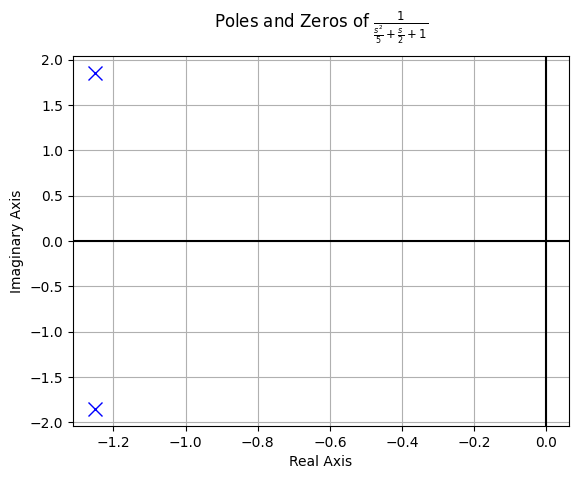

In [ ]:
HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.pole_zero_plot(HRLC)

* **Diagrama de Bode**

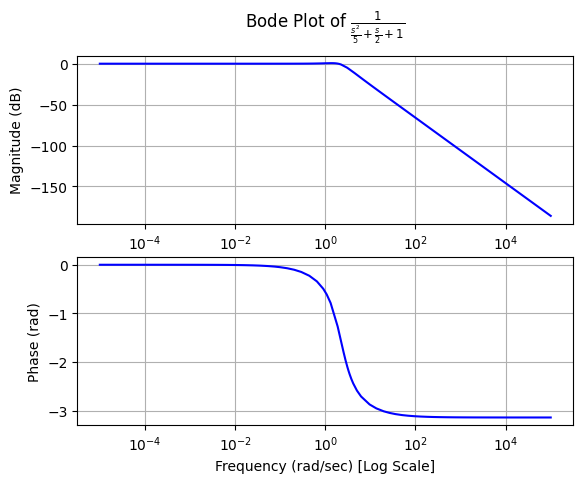

In [ ]:
control.bode_plot(HRLC)

* **Respuesta impulso**

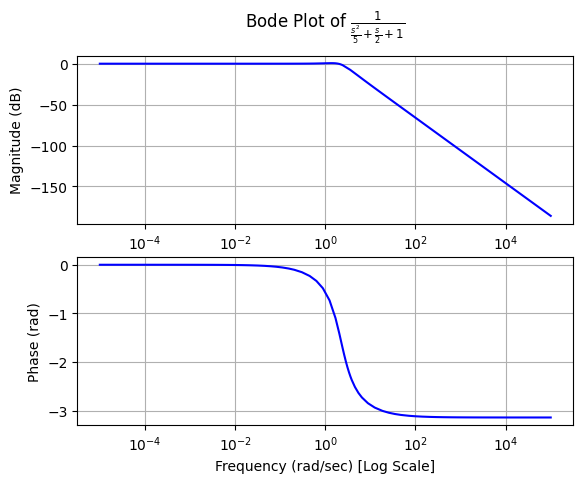

In [ ]:
control.bode_plot(HRLC)

* **Respuesta escalón**

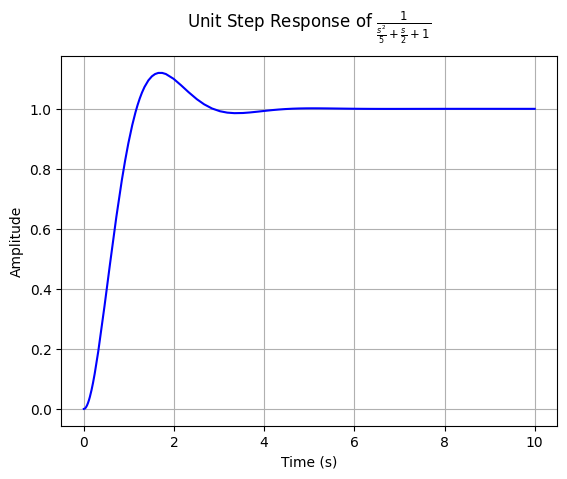

In [ ]:
control.step_response_plot(HRLC)

* **Respuesta rampa**

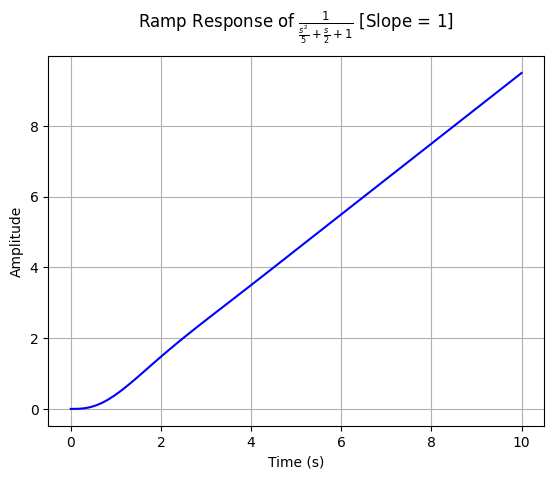

In [ ]:
control.ramp_response_plot(HRLC)